# Q4 

In [1]:
from collections import OrderedDict
import numpy as np
import random
import pyhash
import matplotlib.pyplot as plt
from statistics import median
from prettytable import PrettyTable


In [2]:
!pip install prettytable

In [4]:
f=open('Q4_data/train.data','r')
l=[i.strip().split() for i in f.readlines()]
data=[]
### wordid and count
for i in l:
    data.append((int(i[1]),int(i[2])))
    

    
# print(data[:10])


### storing word_id : its count
word_dic={}

for p in data:
    if p[0] in word_dic:
        word_dic[p[0]]+=p[1]
    else:
        word_dic[p[0]]=p[1]
        
### sort the dictionary wrt count
max_words=OrderedDict(sorted(word_dic.items(), key=lambda t: t[1]))
max_words=list(max_words.items())
max_words=max_words[-1000:]  ### 1000
query_list=random.sample(max_words,100)   ## pickout 100 random 
# print(query_list)

[(1, 4), (2, 2), (3, 10), (4, 4), (5, 2), (6, 1), (7, 1), (8, 1), (9, 3), (10, 9)]


In [68]:
def Cm_Sketch(k):
    global data
    w=5
    d=k//w
    hash_func=[pyhash.metro_64(seed=i) for i in range(w)]
    table=np.zeros((w,d))
    for p in stream:
        for i in range(w):
            j=hash_func[i](str(p[0]))%d
            table[i][j]+=p[1]
    return [table,hash_func]

In [69]:
def Cs_Sketch(k):
    global data
    w=5
    d=k//w
    hash_func=[pyhash.metro_64(seed = i) for i in range(w)]
    g_hash_func=[pyhash.metro_64(seed = i) for i in range(w,2*w)]
    table=np.zeros((w,d))
    for x in data:
        for i in range(w):
            j=hash_func[i](str(x[0]))%d
            sign=2*(g_hash_func[i](str(x[0]))%2)-1
            table[i][j]+=sign*x[1]
    return [table,hash_func,g_hash_func]


In [70]:
def Misra_Gries_Sketch(k):
    global data
    freq_dic={}
    for x in data:
        if x[0] in freq_dic:
            freq_dic[x[0]]+=x[1]
        elif len(freq_dic)<k-1:
            freq_dic[x[0]]=x[1]
        else:
            n=[]
            for i in freq_dic:
                freq_dic[i]-=x[1]
                if freq_dic[i]<=0:
                    n.append(freq_dic[i])
            if len(n)>0:
                m=-min(n)
                freq_dic[x[0]]=m
                d=[]
                for i in freq_dic:
                    freq_dic[i]+=m
                    if freq_dic[i]==0:
                        d.append(i)
                for j in d:
                    del freq_dic[j]
    return freq_dic

In [71]:
def Cs_Query(table,  hash_func,  g_hash_func, x, d):
    w=5
    result=[]
    for i in range(w):
        j=hash_func[i](str(x))%d
        sign=2*(g_hash_func[i](str(x))%2)-1
        result.append(sign*table[i][j])
    return median(result)

In [72]:
def Cm_Query(table,hash_func,x,d):
    w=5
    result=[]
    for i in range(w):
        j=hash_func[i](str(x))%d
        result.append(table[i][j])
    return min(result)

In [73]:
def Mg_Query(freq,x):
    if x in freq:
        return freq[x]
    return 0

# Sketch Computation

In [74]:
cm=[]
cs=[]
mg=[]

### as per the question
K_list=[100,200,500,1000,2000]
for k in K_list:
    cm.append(Cm_Sketch(k))
    cs.append(Cs_Sketch(k))
    mg.append(Misra_Gries_Sketch(k))

# Error calculations

In [75]:
cm_error=[]
cs_error=[]
mg_error=[]
for i in range(len(K_list)):
    err_cm=0
    err_cs=0
    err_mg=0
    for j in query_list:
        x=j[0]
        y=j[1]
        err_cm+=abs(cm_query(cm[i][0],cm[i][1],x,cm[i][0].shape[1])-y)/y
        err_cs+=abs(cs_query(cs[i][0],cs[i][1],cs[i][2],x,cs[i][0].shape[1])-y)/y
        err_mg+=abs(mg_query(mg[i],x)-y)/y
    cm_error.append(err_cm/100)
    cs_error.append(err_cs/100)
    mg_error.append(err_mg/100)

# Table

In [62]:
table=PrettyTable(['Sketch\\k']+K_list)
table.add_row(['CM Sketch']+cm_error)
table.add_row(['CS Sketch']+cs_error)
table.add_row(['Misra-Gries Sketch']+mg_error)
print(table)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Sketch\k      |        100         |        200         |        500         |        1000        |        2000        |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     CM Sketch      | 154.35662664867422 | 67.71429463262264  | 23.625279859804674 | 10.126970336489123 | 4.070373201222307  |
|     CS Sketch      | 21.885286713271338 | 12.106181631478323 | 5.502845424850691  | 2.5336062259853844 | 1.4592332611809775 |
| Misra-Gries Sketch | 0.9990731787891779 | 0.9935717805777838 | 0.9770975044958822 | 0.9390434949257538 | 0.7758444865289253 |
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+


# Table Plotting

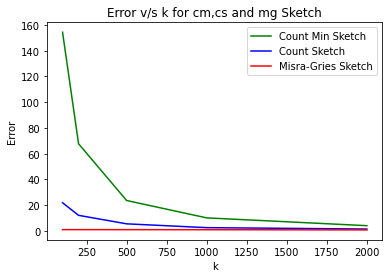

In [65]:
plt.figure(1)
plt.plot(K_list,cm_error,label="Count Min Sketch ", color='green')
plt.plot(K_list,cs_error,label="Count Sketch", color = 'blue')
plt.plot(K_list,mg_error,label="Misra-Gries Sketch" , color='red')
plt.xlabel("k")
plt.ylabel("Error")
plt.legend()
plt.title('Error v/s k for cm,cs and mg Sketch')
plt.show()
plt.close()

# Performance:

Misra-Gries Sketch  <  Count Sketch  < Count Min